# Top 100 movie analysis 

### The aim of this project is to web scrap data and then perform EDA.  The data used in this project is on the current top 100 movies. The attributes of this data include the name of Director(s), Duration of Movie, Rating and Gross value. The data was web scrapped from the IMDb website https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
name = []                   # Empty lists to fill later
year = []
duration = []
rating = []
metascore = []
votes = []
gross = []
director = []

In [4]:
movie_data = soup.findAll('div',attrs = {'class': 'lister-item mode-advanced'}) 

for store in movie_data:
    
    movie_name = store.h3.a.text
    name.append(movie_name)
    
    year_of_release = store.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(', '').replace(')', '') # to remove brackets around year
    year.append(year_of_release)
    
    movie_duration = store.p.find('span', class_ = 'runtime').text.replace('min', '')  # remove word 'min'
    duration.append(movie_duration)
    
    movie_rating = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(movie_rating)
    
    movie_metascore = store.find('span', class_ = 'metascore').text.replace('', '') if store.find('span', class_ = 'metascore')  else np.NaN   # some movies do not have a metascore
    metascore. append(movie_metascore)
    
    value = store.find_all('span', attrs = {'name': 'nv'}) # gives votes (value[0]) and gross (value[1])  
    
    movie_votes = value[0].text
    votes.append(movie_votes)
    
    movie_gross = value[1].text.replace('$', '').replace('M', '')      if len(value)>1 else np.NaN  # some movies do not have a gross value
                                                                                                    # removed $ and M (million) from data
    gross.append(movie_gross)
    
    Movie_cast = store.find("p", class_ = '')                   
    Movie_cast =  Movie_cast.text.replace('\n', '').split('|')
    Movie_cast = [x.strip() for x in  Movie_cast]
    Movie_cast = [ Movie_cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
    director.append( Movie_cast[0])



In [5]:
data = pd.DataFrame({'Name of Movie' : name, 'Year of Release': year ,'Director' : director, 'Duration': duration,  'Rating': rating, 'Metascore' : metascore, 'Votes': votes, 'Gross': gross})

In [6]:
data.head(10)

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
0,Jai Bhim,2021,T.J. Gnanavel,164,9.5,NaN,"153,235",NaN
1,The Shawshank Redemption,1994,Frank Darabont,142,9.3,80,"2,501,687",28.34
2,The Godfather,1972,Francis Ford Coppola,175,9.2,100,"1,724,701",134.97
3,Soorarai Pottru,2020,Sudha Kongara,153,9.1,NaN,"104,039",NaN
4,The Dark Knight,2008,Christopher Nolan,152,9.0,84,"2,451,539",534.86
5,The Godfather: Part II,1974,Francis Ford Coppola,202,9.0,90,"1,196,821",57.30
6,12 Angry Men,1957,Sidney Lumet,96,9.0,96,"738,911",4.36
7,The Lord of the Rings: The Return of the King,2003,Peter Jackson,201,8.9,94,"1,728,507",377.85
8,Pulp Fiction,1994,Quentin Tarantino,154,8.9,94,"1,930,706",107.93
9,Schindler's List,1993,Steven Spielberg,195,8.9,94,"1,280,281",96.90


### Check for null values in the dataset

In [7]:
data.isnull().sum()   

Name of Movie       0
Year of Release     0
Director            0
Duration            0
Rating              0
Metascore          22
Votes               0
Gross              21
dtype: int64

### Data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name of Movie    100 non-null    object
 1   Year of Release  100 non-null    object
 2   Director         100 non-null    object
 3   Duration         100 non-null    object
 4   Rating           100 non-null    object
 5   Metascore        78 non-null     object
 6   Votes            100 non-null    object
 7   Gross            79 non-null     object
dtypes: object(8)
memory usage: 6.4+ KB


### Movie Year of Release

In [9]:
data['Year of Release'].unique()      # Some Year of Release data contain letters 

array(['2021', '1994', '1972', '2020', '2008', '1974', '1957', '2003',
       '1993', '2010', '1999', '2001', '1966', '2002', '1990', '1980',
       '1975', '2019', '2014', '1998', '1997', '1995', '1991', '1977',
       '1962', '1954', '1946', 'II 2018', '2011', '2006', '2000', '1988',
       '1985', '1968', '1960', '1942', '1936', '1931', '2018', '2017',
       '2016', 'I 2017', '2012', '2009', '2007', '1981', '1979', '1963',
       '1964', '1955', '1950', '1940', '2013', 'I 2020'], dtype=object)

In [10]:
data.replace('II 2018', '2018', inplace=True)    # To permanently remove letters from Year of Release data
data.replace('I 2017', '2017', inplace=True)
data.replace('I 2020', '2020', inplace=True)

## Earliest and most recent movie release

In [11]:
data.sort_values(by= ['Year of Release']).head()

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
57,City Lights,1931,Charles Chaplin,87,8.5,99,"177,693",0.02
56,Modern Times,1936,Charles Chaplin,87,8.5,96,"231,095",0.16
88,The Great Dictator,1940,Charles Chaplin,125,8.4,NaN,"215,099",0.29
55,Casablanca,1942,Michael Curtiz,102,8.5,100,"547,703",1.02
36,It's a Wonderful Life,1946,Frank Capra,130,8.6,89,"426,941",NaN


### The oldest movie is City Lights (1931). 

In [12]:
data.sort_values(by= ['Year of Release']).tail()

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
58,Hamilton,2020,Thomas Kail,160,8.4,90,"77,620",NaN
24,Drishyam 2,2021,Jeethu Joseph,152,8.6,NaN,"32,311",NaN
17,Shershaah,2021,Vishnuvardhan,135,8.7,NaN,"109,054",NaN
12,Sardar Udham,2021,Shoojit Sircar,164,8.8,NaN,"31,208",NaN
0,Jai Bhim,2021,T.J. Gnanavel,164,9.5,NaN,"153,235",NaN


### The most recent movies are Drishyam 2, Shershaah, Sardar Udham and Jai Bhim	. 

### Countplot of  Year of Release 

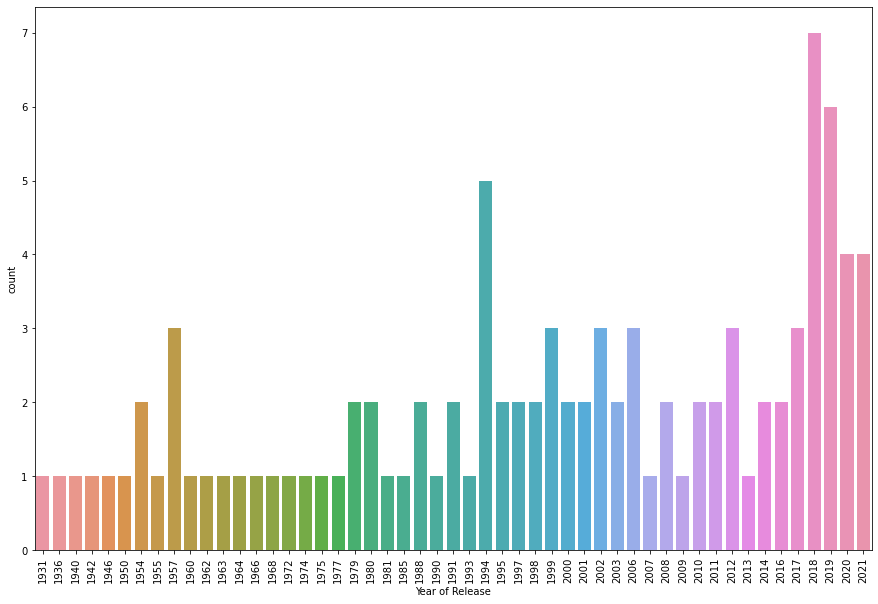

In [13]:
plt.figure(figsize=(15,10))
data_year = data.sort_values(by=['Year of Release'])           # sort data my Year of Release 
sns.countplot(x ='Year of Release', data= data_year)
plt.xticks(rotation=90);

### The year with the highest number of top movies is 2018.

## Highest and Lowest rated movies

In [14]:
data['Rating']= data['Rating'].astype(float)     # Convert Rating values from object to float 
Max_Rating = data['Rating'].max()                # Find max and min Gross values 
Min_Rating = data['Rating'].min()

In [15]:
# To find the lowest rated movie(s)

data[data['Rating']==Min_Rating]

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
89,Chhichhore,2019,Nitesh Tiwari,143,8.3,NaN,"45,994",0.90
90,1917,2019,Sam Mendes,119,8.3,78,"511,026",159.23
91,Uri: The Surgical Strike,2019,Aditya Dhar,138,8.3,NaN,"53,805",4.19
92,Tumbbad,2018,"Directors:Rahi Anil Barve, Anand Gandhi, Adesh...",104,8.3,NaN,"38,525",NaN
93,K.G.F: Chapter 1,2018,Prashanth Neel,156,8.3,NaN,"49,655",NaN
94,Vikram Vedha,2017,"Directors:Gayatri, Pushkar",147,8.3,NaN,"34,829",NaN
95,Drishyam,2013,Jeethu Joseph,160,8.3,NaN,"38,687",NaN
96,The Hunt,2012,Thomas Vinterberg,115,8.3,77,"308,305",0.69
97,A Separation,2011,Asghar Farhadi,123,8.3,95,"234,181",7.10
98,Incendies,2010,Denis Villeneuve,131,8.3,80,"165,805",6.86


### The lowest rated movies all have a Rating of 8.3.

In [16]:
# To find the highest rated movie(s)

data[data['Rating'] == Max_Rating]

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
0,Jai Bhim,2021,T.J. Gnanavel,164,9.5,NaN,"153,235",NaN


### The highest rated movie is Jai Bhim, which happens to be one of the newer movies in the dataset. Question- does Year of Release effect Rating?

## Top 10 directors 

In [17]:
data['Director'].value_counts().head(10)

Christopher Nolan       6
Charles Chaplin         3
Peter Jackson           3
Stanley Kubrick         3
Steven Spielberg        3
Francis Ford Coppola    3
Alfred Hitchcock        2
David Fincher           2
Hayao Miyazaki          2
Akira Kurosawa          2
Name: Director, dtype: int64

Text(0, 0.5, 'Number of Movies')

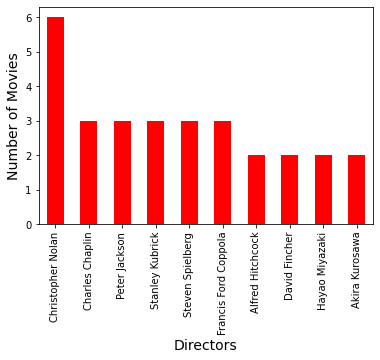

In [18]:
data['Director'].value_counts().head(10).plot.bar(color='red')
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Number of Movies',fontsize=14)

### Movies directed by Christopher Nolan   

In [19]:
data[data['Director']=='Christopher Nolan']

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
4,The Dark Knight,2008,Christopher Nolan,152,9.0,84,"2,451,539",534.86
10,Inception,2010,Christopher Nolan,148,8.8,74,"2,199,857",292.58
25,Interstellar,2014,Christopher Nolan,169,8.6,74,"1,649,866",188.02
40,The Prestige,2006,Christopher Nolan,130,8.5,66,"1,259,499",53.09
70,The Dark Knight Rises,2012,Christopher Nolan,164,8.4,78,"1,595,677",448.14
76,Memento,2000,Christopher Nolan,113,8.4,80,"1,179,946",25.54


### Movies directed by Peter Jackson  or Nitesh Tiwari 

In [20]:
data[(data['Director']=='Peter Jackson') | (data['Director']=='Nitesh Tiwari')]

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
7,The Lord of the Rings: The Return of the King,2003,Peter Jackson,201,8.9,94,"1,728,507",377.85
14,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,178,8.8,92,"1,749,784",315.54
18,The Lord of the Rings: The Two Towers,2002,Peter Jackson,179,8.7,87,"1,562,486",342.55
64,Dangal,2016,Nitesh Tiwari,161,8.4,NaN,"174,608",12.39
89,Chhichhore,2019,Nitesh Tiwari,143,8.3,NaN,"45,994",0.90


### Movie Durations 

In [21]:
data['Duration'].unique()

array(['164 ', '142 ', '175 ', '153 ', '152 ', '202 ', '96 ', '201 ',
       '154 ', '195 ', '148 ', '130 ', '139 ', '178 ', '135 ', '179 ',
       '136 ', '146 ', '124 ', '133 ', '132 ', '169 ', '125 ', '189 ',
       '116 ', '127 ', '118 ', '121 ', '207 ', '158 ', '106 ', '112 ',
       '151 ', '150 ', '155 ', '119 ', '110 ', '88 ', '137 ', '89 ',
       '165 ', '109 ', '102 ', '87 ', '160 ', '126 ', '122 ', '170 ',
       '161 ', '117 ', '181 ', '149 ', '105 ', '98 ', '120 ', '113 ',
       '134 ', '115 ', '147 ', '143 ', '95 ', '138 ', '104 ', '156 ',
       '123 ', '131 ', '97 '], dtype=object)

In [22]:
# To change data type from object to integer
data['Duration'] = data['Duration'].astype(str).astype(int)

data['Duration'].max()      # Maximum duration 

207

In [23]:
data['Duration'].min()      # Minimum duration 

87

In [24]:
data['Duration'].mean()     # Average duration 

136.76

### Histogram of Movie Duration 

Text(0.5, 1.0, 'Movie Duration')

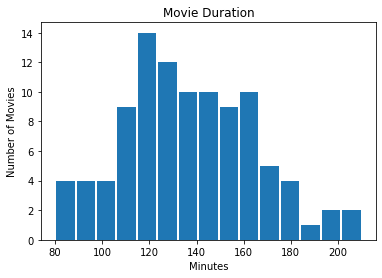

In [25]:
plt.hist(data['Duration'], range=(80,210), bins=15, rwidth=0.9)
plt.xlabel('Minutes')
plt.ylabel('Number of Movies')
plt.title('Movie Duration')

### Boxplot of Movie Duration over the decades

In [26]:
data_decade = data.copy()
data_decade['Year of Release'] = data['Year of Release'].astype(str).astype(int)  # change data type from object to integer 
data_decade['Year of Release'] = ((data_decade['Year of Release'] // 10) *10)    # group data by decade

Text(0.5, 0, 'Decade')

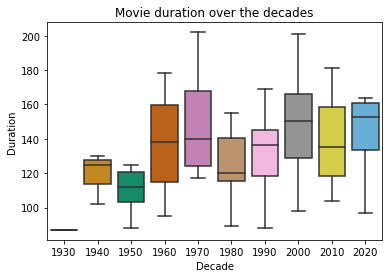

In [27]:
sns.boxplot(x='Year of Release', y='Duration', data=data_decade, palette='colorblind', showfliers= False)
plt.title('Movie duration over the decades')
plt.xlabel('Decade')

### Highest and lowest movie Gross 

In [28]:
data['Gross']= data['Gross'].astype(float)     # Convert Gross values from string to float 
Max_Gross = data['Gross'].max()                # Find max and min Gross values 
Min_Gross = data['Gross'].min()

In [29]:
data[data['Gross']==Max_Gross]                # gives the highest grossing movie 

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
66,Avengers: Endgame,2019,"Directors:Anthony Russo, Joe Russo",181,8.4,78,"969,405",858.37


#### The highest grossing movie is Avengers: Endgame	with a Gross value of $858.37 million. 

In [30]:
data[data['Gross']==Min_Gross]               # gives the lowest grossing movie 

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
57,City Lights,1931,Charles Chaplin,87,8.5,99,"177,693",0.02


#### The lowest grossing movie is City Lights with a Gross value of $0.02 million. 

In [31]:
data_Gross = data.sort_values('Gross', ascending =False).head(10)    # data arranged by Gross value 
data_Gross

,Name of Movie,Year of Release,Director,Duration,Rating,Metascore,Votes,Gross
66,Avengers: Endgame,2019,"Directors:Anthony Russo, Joe Russo",181,8.4,78,"969,405",858.37
67,Avengers: Infinity War,2018,"Directors:Anthony Russo, Joe Russo",149,8.4,68,"947,665",678.82
4,The Dark Knight,2008,Christopher Nolan,152,9.0,84,"2,451,539",534.86
70,The Dark Knight Rises,2012,Christopher Nolan,164,8.4,78,"1,595,677",448.14
47,The Lion King,1994,"Directors:Roger Allers, Rob Minkoff",88,8.5,88,"994,527",422.78
7,The Lord of the Rings: The Return of the King,2003,Peter Jackson,201,8.9,94,"1,728,507",377.85
18,The Lord of the Rings: The Two Towers,2002,Peter Jackson,179,8.7,87,"1,562,486",342.55
60,Joker,2019,Todd Phillips,122,8.4,59,"1,104,501",335.45
15,Forrest Gump,1994,Robert Zemeckis,142,8.8,82,"1,931,008",330.25
33,Star Wars: Episode IV - A New Hope,1977,George Lucas,121,8.6,90,"1,289,179",322.74


Text(0.5, 1.0, 'Top 10 movies with highest Gross')

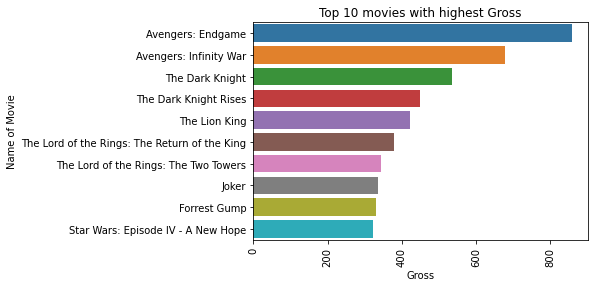

In [32]:
sns.barplot(y='Name of Movie', x='Gross', data= data_Gross)
plt.xticks(rotation=90);
plt.title('Top 10 movies with highest Gross')

### Does Year of Release effect Ratings, Metascore or Votes?
### Earlier we found that the highest rated movie is Jai Bhim, which happens to be one of the newer movies in the dataset. We are interested in whether Year of Release influences the other attributes of the dataset.

In [33]:
data_scores = data[['Year of Release','Rating','Metascore','Votes']].dropna()    # Remove all Null values
data_scores

,Year of Release,Rating,Metascore,Votes
1,1994,9.3,80,"2,501,687"
2,1972,9.2,100,"1,724,701"
4,2008,9.0,84,"2,451,539"
5,1974,9.0,90,"1,196,821"
6,1957,9.0,96,"738,911"
...,...,...,...,...
90,2019,8.3,78,"511,026"
96,2012,8.3,77,"308,305"
97,2011,8.3,95,"234,181"
98,2010,8.3,80,"165,805"


In [34]:
data_scores['Year of Release']= data_scores['Year of Release'].astype(int)            # convert data to integer data type 
data_scores['Rating']= data_scores['Rating'].astype(float)                 
data_scores['Metascore']= data_scores['Metascore'].astype(int) 

# Convert Votes from string to integer 
data_scores['Votes'][1]                  # need to remove commas first and then convert to a float

'2,501,687'

In [35]:
data_scores['Votes'][1].replace(',','')

'2501687'

In [36]:
data_scores['Votes'] = data_scores['Votes'].str.replace(',', '').astype(float)

<AxesSubplot:>

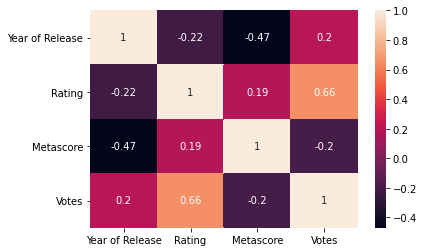

In [37]:
sns.heatmap(data_scores.corr().round(2),annot=True) 

#### This tells us that there is a positive correlation between Year of Release and the number of Votes i.e. movies released recently receive more votes than older movies. We also find that there is a negative score between Year of Release and Rating. 